In [169]:
from PIL import Image, ImageDraw, ImageFont, ImageColor
import numpy as np
from PIL import ImageOps
import matplotlib.pyplot as plt
from PIL import ImageFilter
import math

# Wstawianie tekstu na obraz

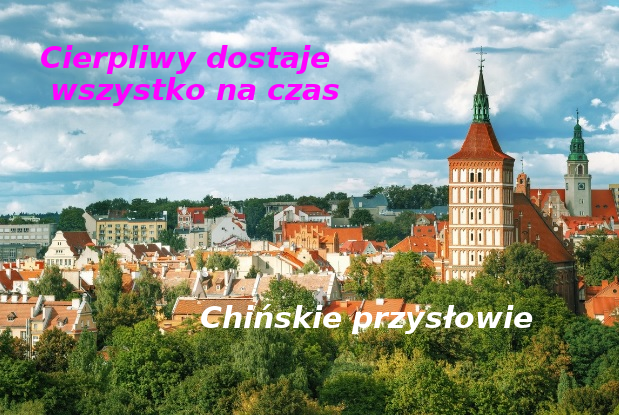

In [170]:
base = Image.open("olsztyn.jpg")
fnt = ImageFont.truetype("ttf/DejaVuSans-BoldOblique.ttf", 30) # fonty pobieramy z biblioteki fontóow -  ImageFont.truetype(font_path, font_size)
# czcionku truetype są skalowalne
d = ImageDraw.Draw(base) # wybór kontekstu
tekst = "Cierpliwy dostaje \n wszystko na czas"
d.text((40,40), tekst, font=fnt, fill=(255, 0, 255), align ="left") # right, center
d.text((200,300), "Chińskie przysłowie", font=fnt, fill=(255,255,255))
base

wstawianie przezroczystego tekstu na obraz

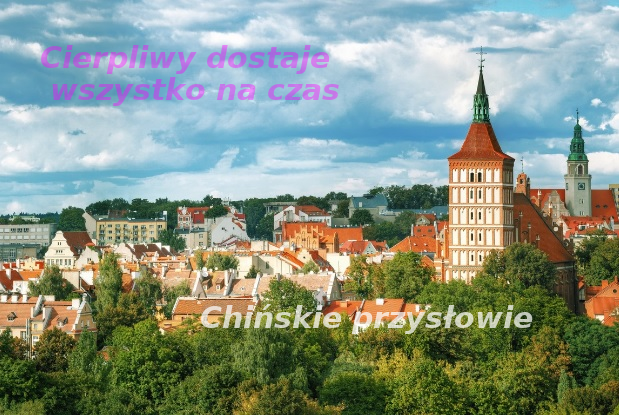

In [171]:
base = Image.open("olsztyn.jpg").convert('RGBA') # otwieramy plik i przygotowujemy kanał alpha do wpisania tekstu

txt = Image.new('RGBA', base.size, (0,0,0,0)) # nowy obraz do wpisania tekstu, tekst pojawi się na kanale alfa
fnt = ImageFont.truetype("ttf/DejaVuSans-BoldOblique.ttf", 30) # fonty pobieramy z biblioteki fontóow -  ImageFont.truetype(font_path, font_size)

d = ImageDraw.Draw(txt) # wybór kontekstu
tekst = "Cierpliwy dostaje \n wszystko na czas"
d.text((40,40), tekst, font=fnt, fill=(255, 0, 255, 100), align ="left") # right, center
d.text((200,300), "Chińskie przysłowie", font=fnt, fill=(255,255,255,180))
out = Image.alpha_composite(base, txt)
out

# rysowanie figur geometrycznych

In [172]:
im = Image.open("olsztyn.jpg")
w, h = im.size
#bbox = [(50, 50), (w - 50, h - 50)] # zakres wstawienia figury, potrzebny  w dalszych przykładach
bbox = (50, 50, w-50, h-50)
bbox1 = (bbox[0] + 20, bbox[1] + 20, bbox[2] - 20, bbox[3] - 20)
bbox2 = (bbox1[0] + 30, bbox1[1] + 30, bbox1[2] - 30, bbox1[3] - 30)

prostokat

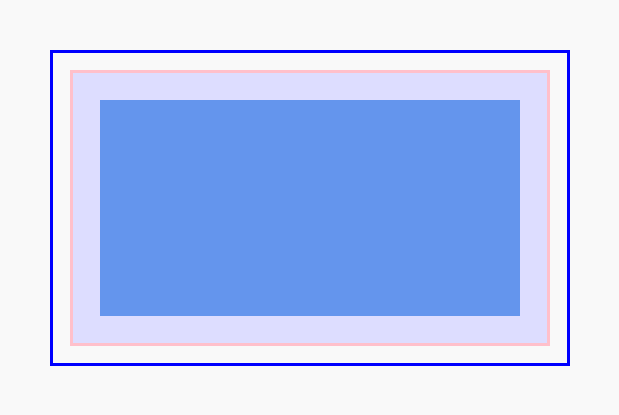

In [173]:
img = Image.new("RGB", (w, h), "#f9f9f9")  # nowy obraz, tryb, rozmiar, kolor --  można narysowac na nowym obrazie
#img = im.copy() # kopia obrazu im
prostokat = ImageDraw.Draw(img)  # na img rysujemy prostokat (tzw. drawing context)
prostokat.rectangle(bbox,  outline="blue", width = 3) # zakres, kolory  ramki, grubośc ramki
prostokat.rectangle( bbox1,  outline="pink", width = 3, fill="#ddddff") # kolor wypełnienia fill 
prostokat.rectangle(bbox2,  fill = (100, 149, 237)) # kolor wypełnienia fill 
del prostokat  # destroy drawing context
img 

elipsa

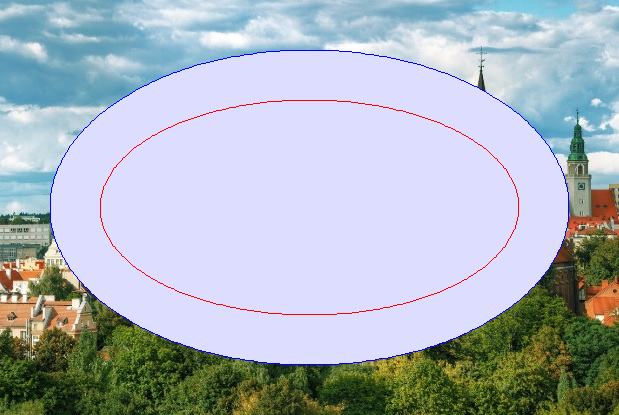

In [174]:
#img = Image.new("RGB", (w, h), "#f9f9f9")  #
img = im.copy()
dctx = ImageDraw.Draw(img)  # skrót dctx od drawing context
dctx.ellipse(bbox, fill="#ddddff", outline="blue") # w prostokąt bbox wpisuje elipsę
dctx.ellipse(bbox2,  outline="red") 
del dctx
img

elipsa jako maska

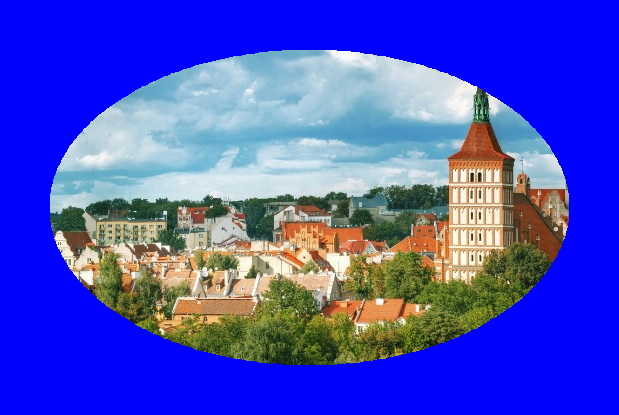

In [175]:
base = im.copy()
elipsa = Image.new('RGB', base.size, (0,0,0))
dctx = ImageDraw.Draw(elipsa)  
dctx.ellipse(bbox, fill='white') 
del dctx
elipsa_a = elipsa.convert('L') # tworzymy maskę
tlo= Image.new('RGB', base.size, 'blue')
tlo.paste(base, (0,0), elipsa_a) # wklejamy  z maską // tam gdzie białe przebija obraz base
tlo
#elipsa_a

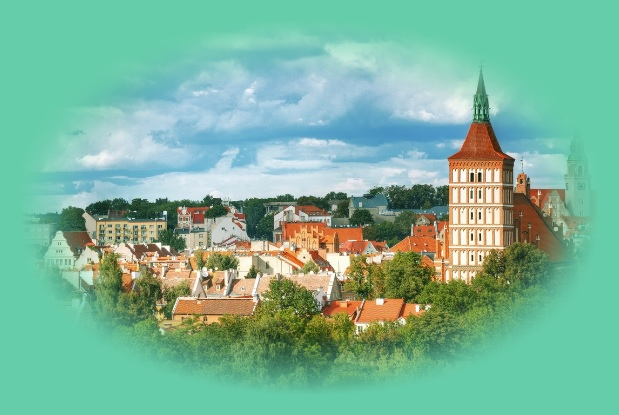

In [176]:
base = im.copy()
elipsa = Image.new('RGB', base.size, (0,0,0))
dctx = ImageDraw.Draw(elipsa)  
dctx.ellipse(bbox, fill='white') 
del dctx
elipsa_a = elipsa.convert('L') 
elipsa_f = elipsa_a.filter(ImageFilter.BoxBlur(30)) # dodajemy blur do maski
tlo= Image.new('RGB', base.size, 'mediumaquamarine')
tlo.paste(base, (0,0), elipsa_f) # wklejamy  z maską
tlo

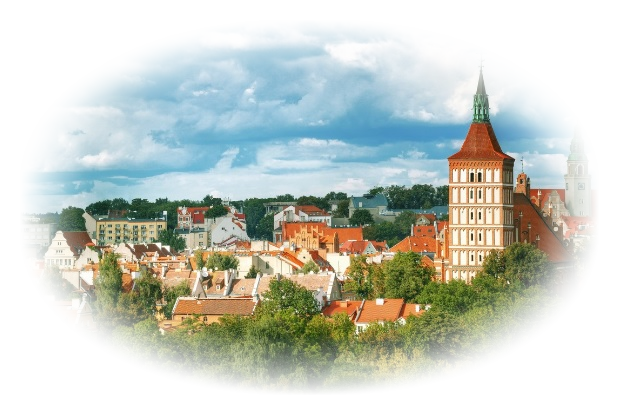

In [177]:
base.putalpha(elipsa_f) 
base

łuki i cięciwy

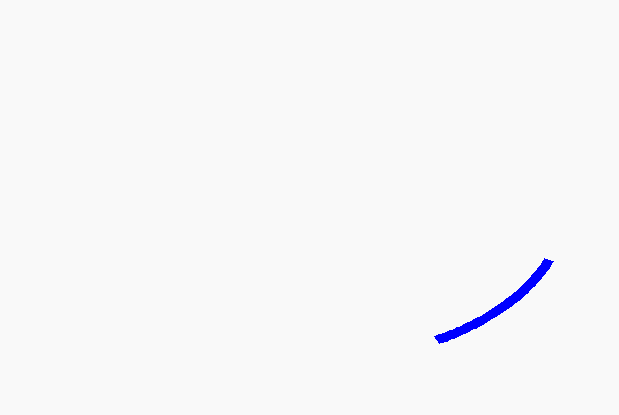

In [178]:
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)
dctx.arc(bbox, start=20, end=60, fill="blue", width = 10) # w zalezności od start i end rysowany jest odpowiedni fragment elipsy wpisanej w prostokąt bbox
del dctx
img

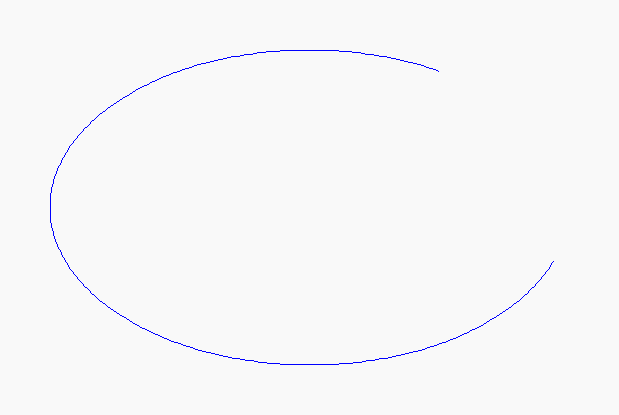

In [179]:
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)
dctx.arc(bbox, start=20, end=300, fill="blue")
del dctx
img

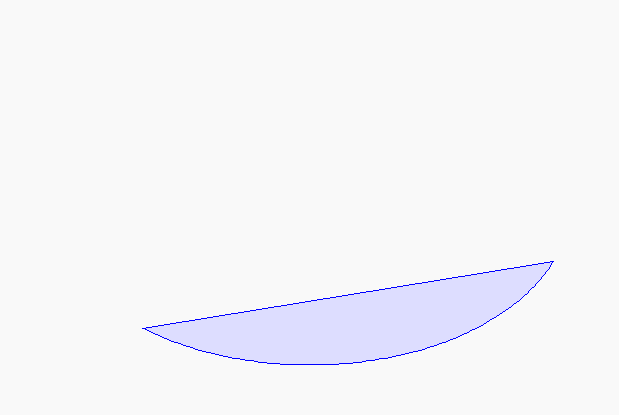

In [180]:
# cięciwa z łukiem
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)
dctx.chord(bbox, start=20, end=130, fill="#ddddff", outline="blue")
del dctx
img

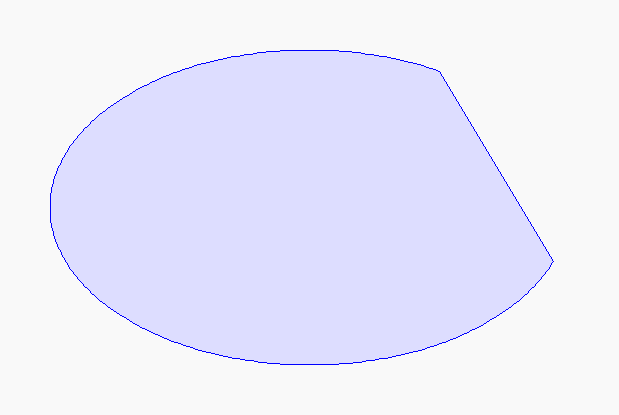

In [181]:
# cieciwa z łukiem 2
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)
dctx.chord(bbox, start=20, end=300, fill="#ddddff", outline="blue")
del dctx
img

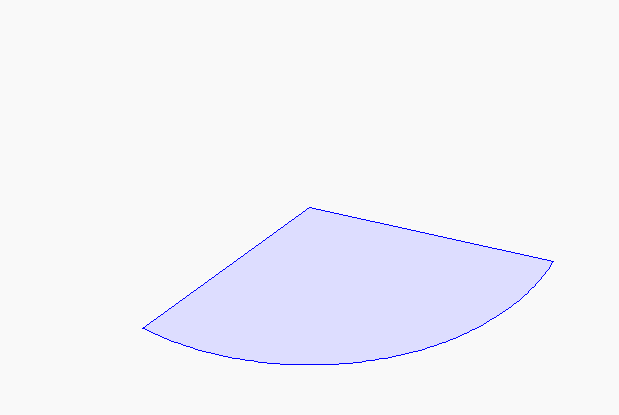

In [182]:
# wycinek koła
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)  #
dctx.pieslice(bbox, start=20, end=130, fill="#ddddff", outline="blue")
del dctx
img

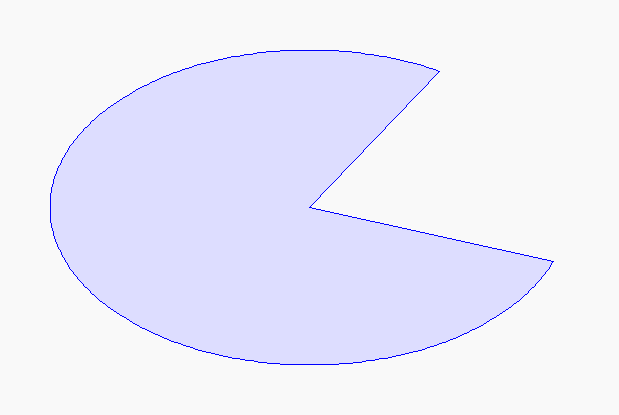

In [183]:
# wycinek koła 2 (end=300)
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)  
dctx.pieslice(bbox, start=20, end=300, fill="#ddddff", outline="blue")
del dctx
img

odcinek

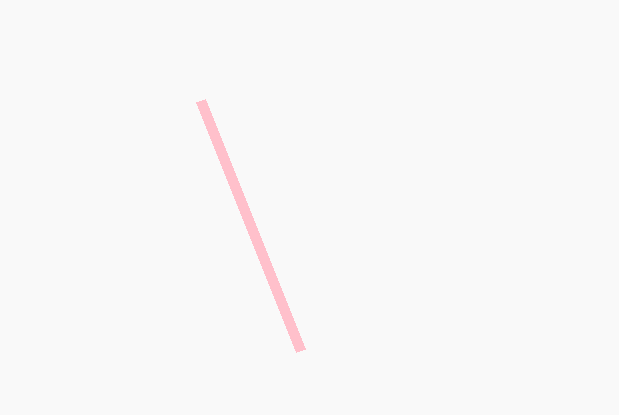

In [184]:
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)
dctx.line((200, 100, 300, 350), fill='pink', width=10)
del dctx
img

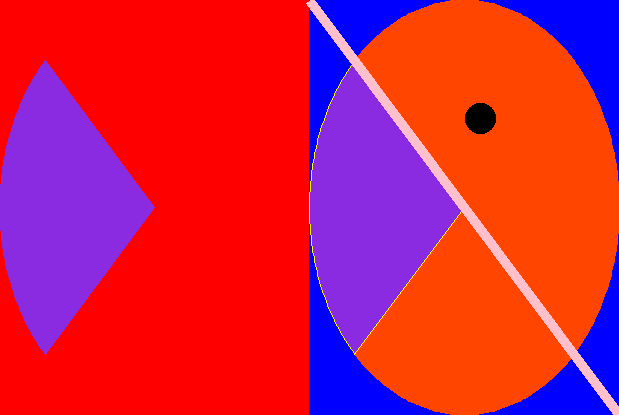

In [185]:
# kompozycja
img = Image.new("RGB", (w, h), "#f9f9f9")
boks=(0,0, int(w/2), h)
boks1=(int(w/2), 0, w, h)
dctx = ImageDraw.Draw(img)  #
dctx.rectangle(boks, fill='red')
dctx.rectangle(boks1, fill='blue')
dctx.pieslice(boks, start=135, end=225, fill="#8a2be2")
dctx.pieslice(boks1, start=225, end=135, fill="#ff4500")
dctx.pieslice(boks1, start=135, end=225, fill="#8a2be2", outline='yellow')
dctx.ellipse((w -int(w/4), int(h/4), w - int(w/4)+30, int(h/4)+30), fill='black')
dctx.line(boks1, fill='pink', width=10)
del dctx
img

wielokąt

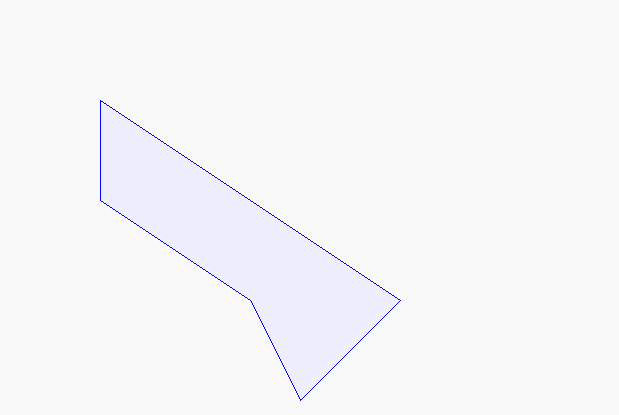

In [186]:
img = Image.new("RGB", (w, h), "#f9f9f9")
dctx = ImageDraw.Draw(img)
coordinates = [(100,100), (100,200), (250,300), (300,400), (400,300), (100,100)]
dctx.polygon(coordinates, fill="#eeeeff", outline="blue")
del dctx
img

punkty

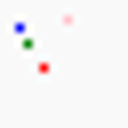

In [187]:
img = Image.new("RGB", (16, 16), "#f9f9f9")  # tworzy nowy obraz
dctx = ImageDraw.Draw(img)  # tworzy kontekst rysunku
dctx.point([(2, 3)], fill="blue")  # rysuje punkt niebieski
dctx.point([(3, 5)], fill="green")  # rysuje punkt zielony
dctx.point([(5, 8)], fill="red")  # rysuje punkt czerwony
dctx.point([(8, 2)], fill="pink")  # rysuje punkt różowy
del dctx  # destroy drawing context
img = img.resize((128, 128)) # powiekszamy obrazek, żeby zobaczyć punkty
img

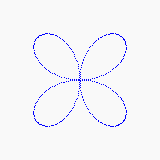

In [188]:
img = Image.new("RGB", (160, 160), "#f9f9f9")  # tworzy nowy obraz
dctx = ImageDraw.Draw(img)  # tworzy kontekst rysunku
for t in range(360):
    x = 80+120*math.sin(t)*math.cos(t)**2
    y = 80+120*math.cos(t)*math.sin(t)**2
    dctx.point([(x, y)], fill="blue")  # rysuje punkt niebieski
del dctx 
img

# lista kolorów

In [189]:
def rgb_to_hex(red, green, blue):
    return '#%02x%02x%02x' % (red, green, blue)
print(rgb_to_hex(255,255,255))

#ffffff


In [190]:
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

print(hex_to_rgb('#ffffff'))

(255, 255, 255)


In [191]:
def wypisz_kolory():
    for n, hex in ImageColor.colormap.items():
        if len(hex) == 3:
            hex = rgb_to_hex(hex[0], hex[1], hex[2])
        print(n, hex, hex_to_rgb(hex))
        
print(len(ImageColor.colormap))

wypisz_kolory()

148
aliceblue #f0f8ff (240, 248, 255)
antiquewhite #faebd7 (250, 235, 215)
aqua #00ffff (0, 255, 255)
aquamarine #7fffd4 (127, 255, 212)
azure #f0ffff (240, 255, 255)
beige #f5f5dc (245, 245, 220)
bisque #ffe4c4 (255, 228, 196)
black #000000 (0, 0, 0)
blanchedalmond #ffebcd (255, 235, 205)
blue #0000ff (0, 0, 255)
blueviolet #8a2be2 (138, 43, 226)
brown #a52a2a (165, 42, 42)
burlywood #deb887 (222, 184, 135)
cadetblue #5f9ea0 (95, 158, 160)
chartreuse #7fff00 (127, 255, 0)
chocolate #d2691e (210, 105, 30)
coral #ff7f50 (255, 127, 80)
cornflowerblue #6495ed (100, 149, 237)
cornsilk #fff8dc (255, 248, 220)
crimson #dc143c (220, 20, 60)
cyan #00ffff (0, 255, 255)
darkblue #00008b (0, 0, 139)
darkcyan #008b8b (0, 139, 139)
darkgoldenrod #b8860b (184, 134, 11)
darkgray #a9a9a9 (169, 169, 169)
darkgrey #a9a9a9 (169, 169, 169)
darkgreen #006400 (0, 100, 0)
darkkhaki #bdb76b (189, 183, 107)
darkmagenta #8b008b (139, 0, 139)
darkolivegreen #556b2f (85, 107, 47)
darkorange #ff8c00 (255, 140, 0)


zapis listy kolorów do pliku

In [192]:
kolory_text = open('kolory.txt', 'w')
for n, hex in ImageColor.colormap.items():
        if len(hex) == 3:
            hex = rgb_to_hex(hex[0], hex[1], hex[2])
        kolory_text.write(str(n) + ' ' + str(hex) + ' ' + str(hex_to_rgb(hex)))
        kolory_text.write('\n')

kolory_text.close()